In [1]:
#from google.colab import drive
#drive.mount("/content/drive/")

In [2]:
#cd /content/drive/MyDrive/Neurips23/Integrating-Spatial-Transform-Networks-with-PaDim-Architecture/
%cd ~/Neurips23/Integrating-Spatial-Transform-Networks-with-PaDim-Architecture

/home/cc/Neurips23/Integrating-Spatial-Transform-Networks-with-PaDim-Architecture


In [3]:
import sys
import os
import numpy as np
sys.path.insert(1, '../')


from src.padim_model import train as padim_train
from src.stn_model import train as stn_train
from src import utils




%load_ext autoreload
%autoreload 2

function ClickConnect() {
  console.log('Working')
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}
intervalTiming = setInterval(ClickConnect, 600000)

function ClickConnect(){
  console.log('Working');
  document.querySelector('colab-toolbar-button#toolbar-add-text').click();
}
intervalTiming = setInterval(ClickConnect, 600000)

In [4]:
utils.set_seed()

In [5]:
!ls

'Enhancing Anomaly_Detection_with_Spatial_Transform_Networks (2).pdf'
 LICENSE
 README.md
 data
 materials
 notebooks
 requirements.txt
 results
 src
 wandb


In [6]:
import torch
torch.cuda.is_available()

True

In [7]:
#stn_model,train_loader = stn_train.start(data_dir ='data',batch_size = 128,learning_rate = 0.0005,num_epochs = 10)

In [8]:
#stn_train.visualize_stn(stn_model,train_loader)

In [9]:
!ls

'Enhancing Anomaly_Detection_with_Spatial_Transform_Networks (2).pdf'
 LICENSE
 README.md
 data
 materials
 notebooks
 requirements.txt
 results
 src
 wandb


In [10]:
#stn_train.save_model(stn_model,model_name='results/stn_model_01.pt')

In [11]:
%ls

'Enhancing Anomaly_Detection_with_Spatial_Transform_Networks (2).pdf'*
 LICENSE*
 README.md*
 data/
 materials/
 notebooks/
 requirements.txt
 results/
 src/
 wandb/


In [12]:
from src.stn_model.model import SpatialTransformerNetwork
import torch
from torch import Tensor, nn

stn_model = SpatialTransformerNetwork()
stn_model = nn.DataParallel(stn_model)
stn_model.to("cuda")

DataParallel(
  (module): SpatialTransformerNetwork(
    (localization): Sequential(
      (0): Conv2d(3, 8, kernel_size=(7, 7), stride=(1, 1))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU(inplace=True)
      (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): ReLU(inplace=True)
    )
    (fc_loc): Sequential(
      (0): Linear(in_features=27040, out_features=32, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=32, out_features=6, bias=True)
    )
  )
)

In [15]:
#stn_model_loaded = stn_train.load_model(stn_model,model_name='results/checkpoint_best_model_mse.pth')
checkpoint = torch.load("results/models/v1_mse/checkpoint_best_model.pth") 

#model = checkpoint["model"]
stn_model.load_state_dict(checkpoint["model_state_dict"])

stn_model.to("cuda")
stn_model.eval()

DataParallel(
  (module): SpatialTransformerNetwork(
    (localization): Sequential(
      (0): Conv2d(3, 8, kernel_size=(7, 7), stride=(1, 1))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU(inplace=True)
      (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): ReLU(inplace=True)
    )
    (fc_loc): Sequential(
      (0): Linear(in_features=27040, out_features=32, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=32, out_features=6, bias=True)
    )
  )
)

In [17]:
#!pip install --upgrade scikit-learn
!ls

'Enhancing Anomaly_Detection_with_Spatial_Transform_Networks (2).pdf'
 LICENSE
 README.md
 data
 materials
 notebooks
 requirements.txt
 results
 src
 wandb


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cristian-ml (ml_projects). Use `wandb login --relogin` to force relogin


/home/cc/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/cc/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/cc/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 160MB/s]
| feature extraction | train | screw |:   0%|          | 0/3 [00:00<?, ?it/s]libibverbs: Warning: couldn't open config directory '/etc/libibverbs.d'.
/home/cc/.local/lib/python3.8/s

screw  test image ROCAUC: 0.732
[0 0 0 ... 0 0 0]
[0.243945   0.24385712 0.2436863  ... 0.04988512 0.04956785 0.04938972]
screw  test pixel ROCAUC: 0.979


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


screw_image_ROCAUC,▁
screw_pixel_ROCAUC,▁
screw_image_ROCAUC,0.73232
screw_pixel_ROCAUC,0.97852


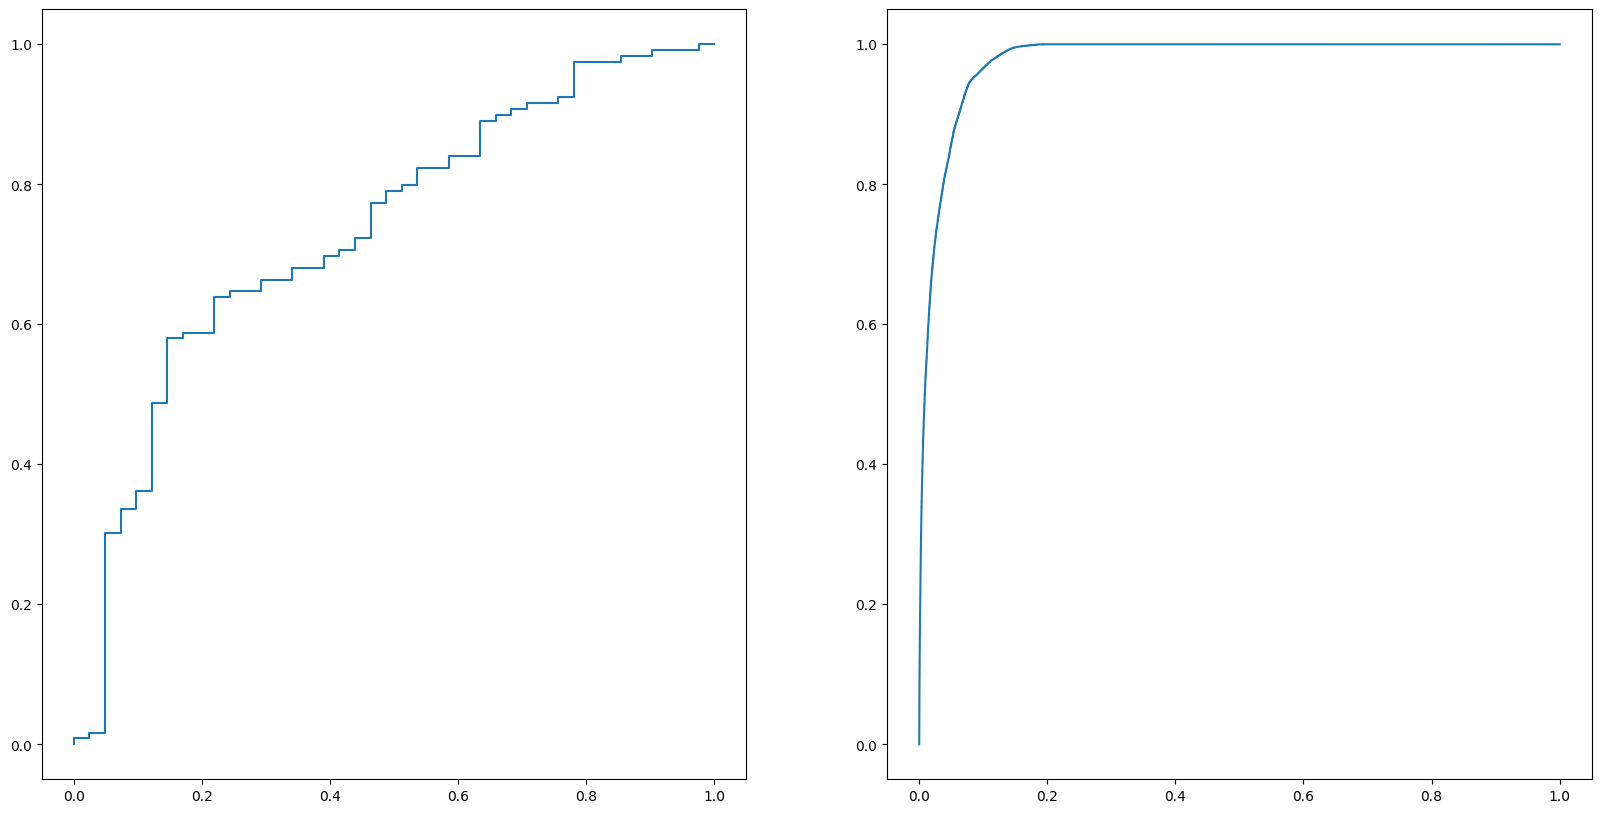

In [19]:
CLASS_NAMES = ['bottle', 'cable', 'capsule', 'carpet', 'grid',
               'hazelnut', 'leather', 'metal_nut', 'pill', 'screw',
               'tile', 'toothbrush', 'transistor', 'wood', 'zipper']

#CLASS_NAMES = ['screw']
fig_pixel_rocauc,fig_img_rocauc,total_roc_auc,total_pixel_roc_auc,fig = padim_train.start(CLASS_NAMES,stn_model,data_path = 'data',
                  arch = 'resnet18',path_results='results/padim_results',batch_size=128,experiment_name='exp-padim',
          use_stn = 0)

In [ ]:
| feature extraction | train | bottle |: 100%|███████████████████████████████████████████| 7/7 [00:17<00:00,  2.49s/it]
| feature extraction | test | bottle |: 100%|████████████████████████████████████████████| 3/3 [00:05<00:00,  1.92s/it]
image ROCAUC: 0.997
pixel ROCAUC: 0.985
| feature extraction | train | cable |:   0%|                                                    | 0/7 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | cable |: 100%|████████████████████████████████████████████| 7/7 [00:23<00:00,  3.34s/it]
| feature extraction | test | cable |: 100%|█████████████████████████████████████████████| 5/5 [00:15<00:00,  3.08s/it]
image ROCAUC: 0.843
pixel ROCAUC: 0.967
| feature extraction | train | capsule |:   0%|                                                  | 0/7 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | capsule |: 100%|██████████████████████████████████████████| 7/7 [00:22<00:00,  3.22s/it]
| feature extraction | test | capsule |: 100%|███████████████████████████████████████████| 5/5 [00:13<00:00,  2.65s/it]
image ROCAUC: 0.868
pixel ROCAUC: 0.985
| feature extraction | train | carpet |:   0%|                                                   | 0/9 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | carpet |: 100%|███████████████████████████████████████████| 9/9 [00:24<00:00,  2.77s/it]
| feature extraction | test | carpet |: 100%|████████████████████████████████████████████| 4/4 [00:10<00:00,  2.63s/it]
image ROCAUC: 0.978
pixel ROCAUC: 0.989
| feature extraction | train | grid |:   0%|                                                     | 0/9 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | grid |: 100%|█████████████████████████████████████████████| 9/9 [00:17<00:00,  1.89s/it]
| feature extraction | test | grid |: 100%|██████████████████████████████████████████████| 3/3 [00:05<00:00,  1.90s/it]
image ROCAUC: 0.916
pixel ROCAUC: 0.922
| feature extraction | train | hazelnut |:   0%|                                                | 0/13 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | hazelnut |: 100%|███████████████████████████████████████| 13/13 [00:34<00:00,  2.65s/it]
| feature extraction | test | hazelnut |: 100%|██████████████████████████████████████████| 4/4 [00:11<00:00,  2.79s/it]
image ROCAUC: 0.811
pixel ROCAUC: 0.984
| feature extraction | train | leather |:   0%|                                                  | 0/8 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | leather |: 100%|██████████████████████████████████████████| 8/8 [00:21<00:00,  2.65s/it]
| feature extraction | test | leather |: 100%|███████████████████████████████████████████| 4/4 [00:10<00:00,  2.65s/it]
image ROCAUC: 0.990
pixel ROCAUC: 0.991
| feature extraction | train | metal_nut |:   0%|                                                | 0/7 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | metal_nut |: 100%|████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]
| feature extraction | test | metal_nut |: 100%|█████████████████████████████████████████| 4/4 [00:07<00:00,  1.81s/it]
image ROCAUC: 0.943
pixel ROCAUC: 0.977
| feature extraction | train | pill |:   0%|                                                     | 0/9 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | pill |: 100%|█████████████████████████████████████████████| 9/9 [00:17<00:00,  1.97s/it]
| feature extraction | test | pill |: 100%|██████████████████████████████████████████████| 6/6 [00:12<00:00,  2.16s/it]
image ROCAUC: 0.814
pixel ROCAUC: 0.957
| feature extraction | train | screw |:   0%|                                                   | 0/10 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | screw |: 100%|██████████████████████████████████████████| 10/10 [00:20<00:00,  2.09s/it]
| feature extraction | test | screw |: 100%|█████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]
image ROCAUC: 0.779
pixel ROCAUC: 0.979
| feature extraction | train | tile |:   0%|                                                     | 0/8 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | tile |: 100%|█████████████████████████████████████████████| 8/8 [00:16<00:00,  2.08s/it]
| feature extraction | test | tile |: 100%|██████████████████████████████████████████████| 4/4 [00:08<00:00,  2.00s/it]
image ROCAUC: 0.968
pixel ROCAUC: 0.925
| feature extraction | train | toothbrush |:   0%|                                               | 0/2 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | toothbrush |: 100%|███████████████████████████████████████| 2/2 [00:05<00:00,  2.52s/it]
| feature extraction | test | toothbrush |: 100%|████████████████████████████████████████| 2/2 [00:03<00:00,  1.74s/it]
image ROCAUC: 0.850
pixel ROCAUC: 0.988
| feature extraction | train | transistor |:   0%|                                               | 0/7 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | transistor |: 100%|███████████████████████████████████████| 7/7 [00:18<00:00,  2.66s/it]
| feature extraction | test | transistor |: 100%|████████████████████████████████████████| 4/4 [00:08<00:00,  2.25s/it]
image ROCAUC: 0.904
pixel ROCAUC: 0.970
| feature extraction | train | wood |:   0%|                                                     | 0/8 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | wood |: 100%|█████████████████████████████████████████████| 8/8 [00:22<00:00,  2.86s/it]
| feature extraction | test | wood |: 100%|██████████████████████████████████████████████| 3/3 [00:07<00:00,  2.66s/it]
image ROCAUC: 0.989
pixel ROCAUC: 0.943
| feature extraction | train | zipper |:   0%|                                                   | 0/8 [00:00<?, ?it/s]C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\renatocastro\anaconda3\envs\iccv\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | zipper |: 100%|███████████████████████████████████████████| 8/8 [00:14<00:00,  1.83s/it]
| feature extraction | test | zipper |: 100%|████████████████████████████████████████████| 5/5 [00:09<00:00,  1.87s/it]
image ROCAUC: 0.799

SyntaxError: ignored

In [ ]:
import matplotlib
%matplotlib inline

In [ ]:
print('Average Image ROCAUC: %.3f' % np.mean(total_roc_auc))
fig_img_rocauc.title.set_text('Average image ROCAUC: %.3f' % np.mean(total_roc_auc))
fig_img_rocauc.legend(loc="lower right")

In [ ]:

print('Average pixel ROCUAC: %.3f' % np.mean(total_pixel_roc_auc))
fig_pixel_rocauc.title.set_text('Average pixel ROCAUC: %.3f' % np.mean(total_pixel_roc_auc))
fig_pixel_rocauc.legend(loc="lower right")


In [ ]:

fig.tight_layout()
fig.savefig(os.path.join('results/mvtec_result', 'roc_curve_fresnet_18.png'), dpi=100)
